In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import algos as al
import func
from bisect import bisect
import imageio.v2 as imageio
import os, shutil

rng = np.random.default_rng(424)

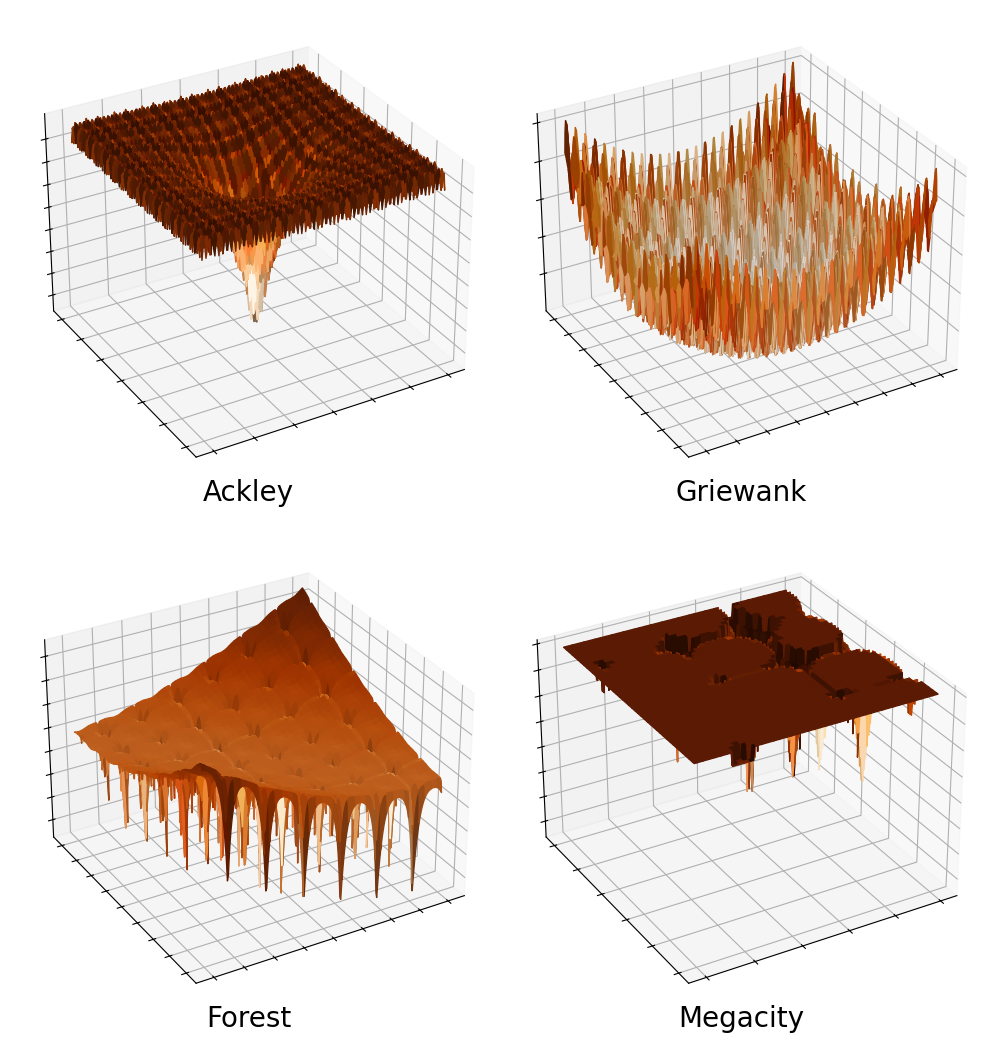

In [7]:
def plot_targets(targets):
    rows = len(targets)
    cols = len(targets[0])

    fig, axes = plt.subplots(
        nrows=rows, ncols=cols, figsize=(10, 11), subplot_kw=dict(projection="3d")
    )
    fig.tight_layout()

    for r in range(rows):
        for c in range(cols):
            for axis in [axes[r][c].xaxis, axes[r][c].yaxis, axes[r][c].zaxis]:
                axis.set_ticklabels([])
            targets[r][c].plot(axes[r][c], 256, cmap=mpl.cm.Oranges)

    fig.savefig("fig/targets.png", dpi=300, transparent=True)


ackley = func.ackley(2)
griewank = func.griewank(2)
forest = func.forest(2)
megacity = func.megacity(2)

plot_targets([[ackley, griewank], [forest, megacity]])

In [8]:
def benchmark(func, algos, n_iters=50, eval_calls_lim=1000):
    fig, axes = plt.subplots()
    lines = []
    legend = []

    for algo in algos:
        eval_ticks = set()
        evolutions = []

        for i in range(n_iters):
            evo: dict = algo.optimize(func, eval_calls_lim)
            eval_ticks.update(evo.keys())
            evo = [(key, value) for key, value in evo.items()]
            evo.sort(key=lambda x: x[0])
            evolutions.append(evo)

        eval_ticks = list(eval_ticks)
        eval_ticks.sort()

        found_mins = []
        for eval_tick in eval_ticks:
            found_min_sum = 0
            evo_cnt = 0

            for evo in evolutions:
                idx = bisect(evo, eval_tick, key=lambda x: x[0])
                if idx == 0:
                    continue
                found_min_sum += evo[idx - 1][1]
                evo_cnt += 1

            # if evo_cnt == 0:
            #     print(eval_tick, evolutions)
            found_mins.append(found_min_sum / evo_cnt)

        line = axes.plot(eval_ticks, found_mins)
        lines.append(line[0])
        legend.append(algo.name)

    axes.legend(tuple(lines), tuple(legend), loc="upper right")

    axes.set_xlabel("Вычисления функции")
    axes.set_ylabel("Найденный минимум")
    axes.grid()

    title = f"comparison_{func.name}"
    axes.set_title(f"Сравнение алгоритмов на функции {func.name}")
    fig.savefig(f"benchmarks/{title}.png", dpi=300, transparent=True)

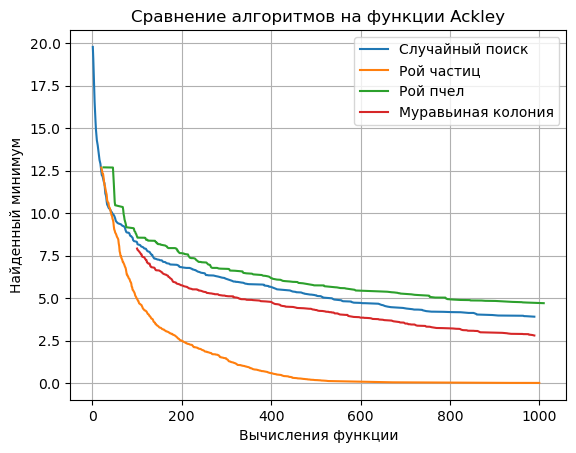

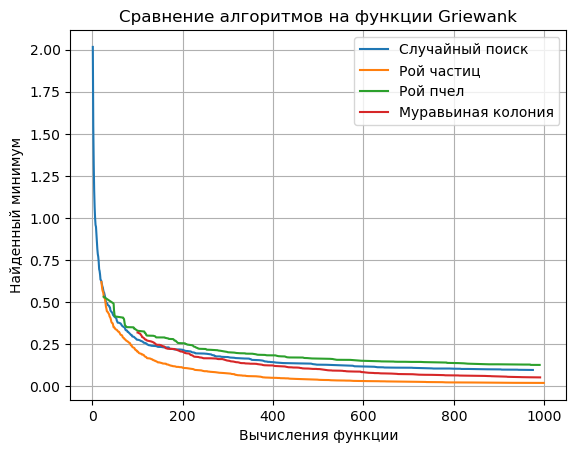

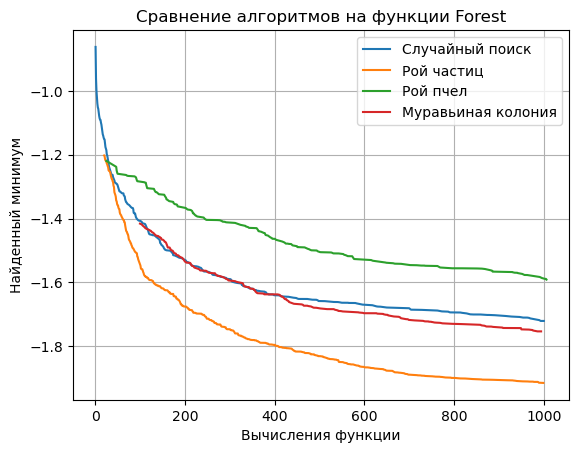

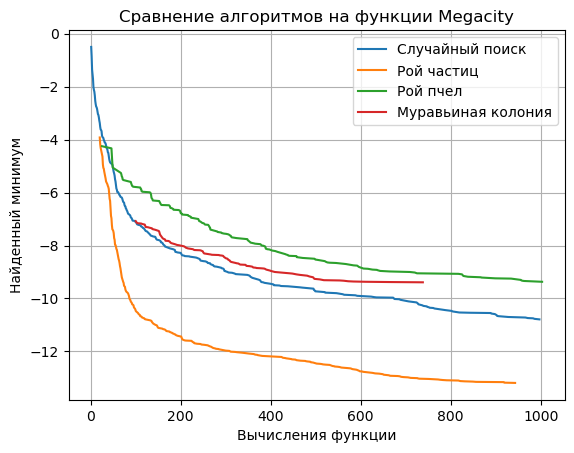

In [9]:
algos = [
    al.RandomSearch("Случайный поиск"),
    al.ParticleSwarm(
        "Рой частиц",
        n_particles=20,
        inertia_cf=0.721,
        cognitive_cf=1.193,
        social_cf=1.193,
    ),
    # al.ParticleSwarm(
    # "Particles", n_particles=20, inertia_cf=1, cognitive_cf=1.193, social_cf=2
    # ),
    # al.TurboBees(
    #     "WeakBees",
    #     shrink_cf=0.9,
    #     n_scouts=34,
    #     n_elites=7,
    #     n_extras=2,
    #     n_elite_sites=1,
    #     n_extra_sites=2,
    # ),
    al.BeesHive("Рой пчел", n_swarms=5, n_bees_in_swarm=5, swarm_radius_frac=0.2),
    al.AntHill("Муравьиная колония", n_ants=100, pher_cf=1, dist_cf=1, skip_cf=1.5),
]
benchmark(ackley, algos=algos, n_iters=100)
benchmark(griewank, algos=algos, n_iters=100)
# benchmark(schwefel, algos=algos, n_iters=100)
# benchmark(skin, algos=algos, n_iters=100)
benchmark(forest, algos=algos, n_iters=100)
benchmark(megacity, algos=algos, n_iters=100)